# Import Libraries

In [1]:
#Python libraries
#Classic,data manipulation 
import numpy as np
import pandas as pd
# Plots
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_rows",None)
from sklearn import preprocessing 
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score,accuracy_score
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.ensemble import StackingClassifier

from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler 
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.model_selection import cross_validate
from sklearn.metrics import roc_curve
from sklearn.metrics import plot_roc_curve
from xgboost import XGBClassifier
from xgboost import XGBRegressor
# Dataprep
# Modeling 
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,VotingClassifier,GradientBoostingClassifier
from imblearn.combine import SMOTEENN #resampling
from sklearn import datasets, linear_model, metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
#Import pipeline to allow you to do multiple steps at once
from imblearn.pipeline import Pipeline, make_pipeline

# Load Dataset 

In [2]:
df= pd.read_csv('diabetes_012_health_indicators_BRFSS2015.csv')
#../input/diabetes-health-indicators-dataset/diabetes_012_health_indicators_BRFSS2015.csv

#diabetes_012_health_indicators_BRFSS2015.csv


# Explore Dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [4]:
df.shape

(253680, 22)

In [5]:
df.sample(10)

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
58785,2.0,1.0,0.0,1.0,42.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,9.0,4.0,6.0
159186,0.0,0.0,1.0,1.0,41.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,4.0,0.0,0.0,5.0,5.0,7.0
70055,0.0,0.0,0.0,0.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,8.0,5.0,8.0
76189,0.0,0.0,0.0,1.0,35.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,7.0,4.0,6.0
193416,0.0,1.0,0.0,1.0,24.0,1.0,0.0,0.0,1.0,1.0,...,1.0,1.0,3.0,7.0,14.0,0.0,0.0,9.0,4.0,4.0
130608,0.0,0.0,1.0,1.0,31.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,9.0,4.0,6.0
155384,2.0,0.0,0.0,1.0,34.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,6.0,6.0,3.0
93940,0.0,1.0,0.0,1.0,23.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,7.0,0.0,0.0,10.0,4.0,2.0
229216,0.0,0.0,0.0,1.0,34.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,5.0,7.0
114679,0.0,1.0,1.0,1.0,29.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,0.0,13.0,4.0,7.0


In [6]:
df.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [7]:
# to rename the some columns important of dataset
df.rename(columns={'Diabetes_012': 'Diabetes_Type'}, inplace=True)
df.head()

,Diabetes_Type,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


# Cleaning Dataset

In [8]:
df.isna().sum() # No missing value

Diabetes_Type           0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [9]:
df.BMI.unique()

array([40., 25., 28., 27., 24., 30., 34., 26., 33., 21., 23., 22., 38.,
       32., 37., 31., 29., 20., 35., 45., 39., 19., 47., 18., 36., 43.,
       55., 49., 42., 17., 16., 41., 44., 50., 59., 48., 52., 46., 54.,
       57., 53., 14., 15., 51., 58., 63., 61., 56., 74., 62., 64., 66.,
       73., 85., 60., 67., 65., 70., 82., 79., 92., 68., 72., 88., 96.,
       13., 81., 71., 75., 12., 77., 69., 76., 87., 89., 84., 95., 98.,
       91., 86., 83., 80., 90., 78.])

Would you say that in general your health is:scale 1-5:
> 1 = excellent 

> 2 = very good 

> 3 = good 

> 4 = fair 

> 5 = poor


In [10]:
df.GenHlth.unique()

array([5., 3., 2., 4., 1.])

Mental health scale:

> scale 1-30 days .

In [11]:
df.MentHlth.unique()

array([18.,  0., 30.,  3.,  5., 15., 10.,  6., 20.,  2., 25.,  1.,  4.,
        7.,  8., 21., 14., 26., 29., 16., 28., 11., 12., 24., 17., 13.,
       27., 19., 22.,  9., 23.])

Now thinking about your physical health, for how many days during the past 30 days 
was your physical health not good?

> scale 1-30 days 

In [12]:
df.PhysHlth.unique()

array([15.,  0., 30.,  2., 14., 28.,  7., 20.,  3., 10.,  1.,  5., 17.,
        4., 19.,  6., 12., 25., 27., 21., 22.,  8., 29., 24.,  9., 16.,
       18., 23., 13., 26., 11.])

13-level age categorys:(_AGEG5YR see codebook)
> 1 = 18-24 

> 9 = 60-64 

> 13 = 80 or older 


In [13]:
df.Age.unique()

array([ 9.,  7., 11., 10.,  8., 13.,  4.,  6.,  2., 12.,  5.,  1.,  3.])

Education level (EDUCA see codebook) scale 1-6:
> 1 = Never attended school or only kindergarten 

> 2 = Grades 1 through 8 (Elementary)

> 3 = Grades 9 throug 11 (Some high school)

> 4 = Grade 12 or GED (High school graduate)

> 5 = College 1 year to 3 years (Some college or technical school) 

> 6 = College 4 years or more (College graduate)

In [14]:
df.Education.unique()

array([4., 6., 3., 5., 2., 1.])

Income scale 1-8:
> 1 = less than $10,000 

> 5 = less than $35,000 

> 8 = $75,000 or more



In [15]:
df.Income.unique()

array([3., 1., 8., 6., 4., 7., 2., 5.])

In [16]:
df.Diabetes_Type.unique()

array([0., 2., 1.])

In [17]:
Diabetes=df['Diabetes_Type']
Diabetes.value_counts()

0.0    213703
2.0     35346
1.0      4631
Name: Diabetes_Type, dtype: int64

In [18]:
df['Diabetes_Type'].replace({2.0: 1.0},inplace = True)

# Preprocessing

# Visualze the correlation 

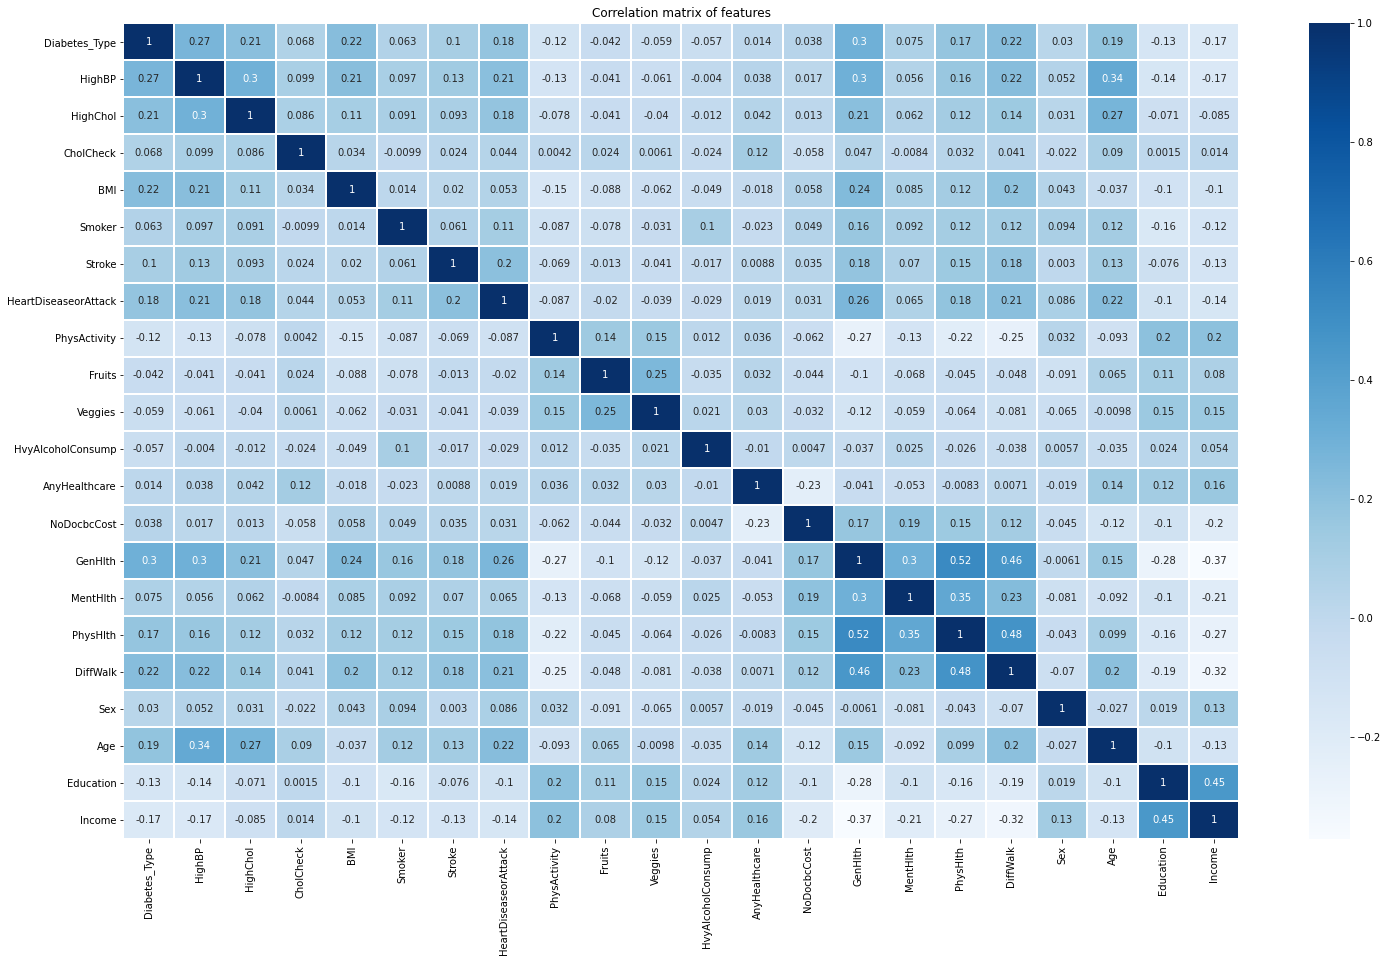

In [19]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(25,15)) 
sns.heatmap(corr,annot=True, cmap = "Blues", linewidth = 0.30)
plt.title("Correlation matrix of features")
plt.show()

In [20]:
df['Diabetes_Type'] = df['Diabetes_Type'].astype('int')
df['HighBP'] = df['HighBP'].astype('int')
df['HighChol'] = df['HighChol'].astype('int')
df['CholCheck'] = df['CholCheck'].astype('int')
df['BMI'] = df['BMI'].astype('int')
df['Smoker'] = df['Smoker'].astype('int')
df['Stroke'] = df['Stroke'].astype('int')
df['HeartDiseaseorAttack'] = df['HeartDiseaseorAttack'].astype('int')
df['PhysActivity'] = df['PhysActivity'].astype('int')
df['Fruits'] = df['Fruits'].astype('int')
df['Veggies'] = df['Veggies'].astype('int')
df['HvyAlcoholConsump'] = df['HvyAlcoholConsump'].astype('int')
df['AnyHealthcare'] = df['AnyHealthcare'].astype('int')
df['NoDocbcCost'] = df['NoDocbcCost'].astype('int')
df['GenHlth'] = df['GenHlth'].astype('int')
df['MentHlth'] = df['MentHlth'].astype('int')
df['PhysHlth'] = df['PhysHlth'].astype('int')
df['DiffWalk'] = df['DiffWalk'].astype('int')
df['Sex'] = df['Sex'].astype('int')
df['Age'] = df['Age'].astype('int')
df['Education'] = df['Education'].astype('int')
df['Income'] = df['Income'].astype('int')
df.head()

,Diabetes_Type,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,40,1,0,0,0,0,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,0,25,1,0,0,1,0,...,0,1,3,0,0,0,0,7,6,1
2,0,1,1,1,28,0,0,0,0,1,...,1,1,5,30,30,1,0,9,4,8
3,0,1,0,1,27,0,0,0,1,1,...,1,0,2,0,0,0,0,11,3,6
4,0,1,1,1,24,0,0,0,1,1,...,1,0,2,3,0,0,0,11,5,4


In [21]:
df['Diabetes']=df['Diabetes_Type']

In [22]:
df['Diabetes'] = df['Diabetes_Type'].map({0:'No Diabetes', 1:'Diabetes'})

In [23]:
Diabetes=df['Diabetes_Type']
Diabetes.value_counts()

0    213703
1     39977
Name: Diabetes_Type, dtype: int64

In [24]:
diabetes_bp = df.groupby(['Diabetes_Type', 'HighBP']).size().reset_index(name = 'Count')
print(diabetes_bp)

   Diabetes_Type  HighBP   Count
0              0       0  134391
1              0       1   79312
2              1       0   10460
3              1       1   29517


In [25]:
df.columns


Index(['Diabetes_Type', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income',
       'Diabetes'],
      dtype='object')

In [26]:
df['GH']=df['GenHlth']

In [27]:
df['GH'] = df['GH'].map({1:5, 2:4 ,3:3 ,4:2 , 5:1})

In [28]:
df.head()

,Diabetes_Type,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes,GH
0,0,1,1,1,40,1,0,0,0,0,...,5,18,15,1,0,9,4,3,No Diabetes,1
1,0,0,0,0,25,1,0,0,1,0,...,3,0,0,0,0,7,6,1,No Diabetes,3
2,0,1,1,1,28,0,0,0,0,1,...,5,30,30,1,0,9,4,8,No Diabetes,1
3,0,1,0,1,27,0,0,0,1,1,...,2,0,0,0,0,11,3,6,No Diabetes,4
4,0,1,1,1,24,0,0,0,1,1,...,2,3,0,0,0,11,5,4,No Diabetes,4


In [29]:
df.isna().sum()

Diabetes_Type           0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
Diabetes                0
GH                      0
dtype: int64

# Build models

# Experiment 1: Split data to training,validation and test set

In [30]:
df.columns

Index(['Diabetes_Type', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income',
       'Diabetes', 'GH'],
      dtype='object')

In [31]:
smaller_df=df.loc[:,['Diabetes_Type', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Age']]
smaller_df1=df.loc[:,['Diabetes_Type', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'GH',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Age']]

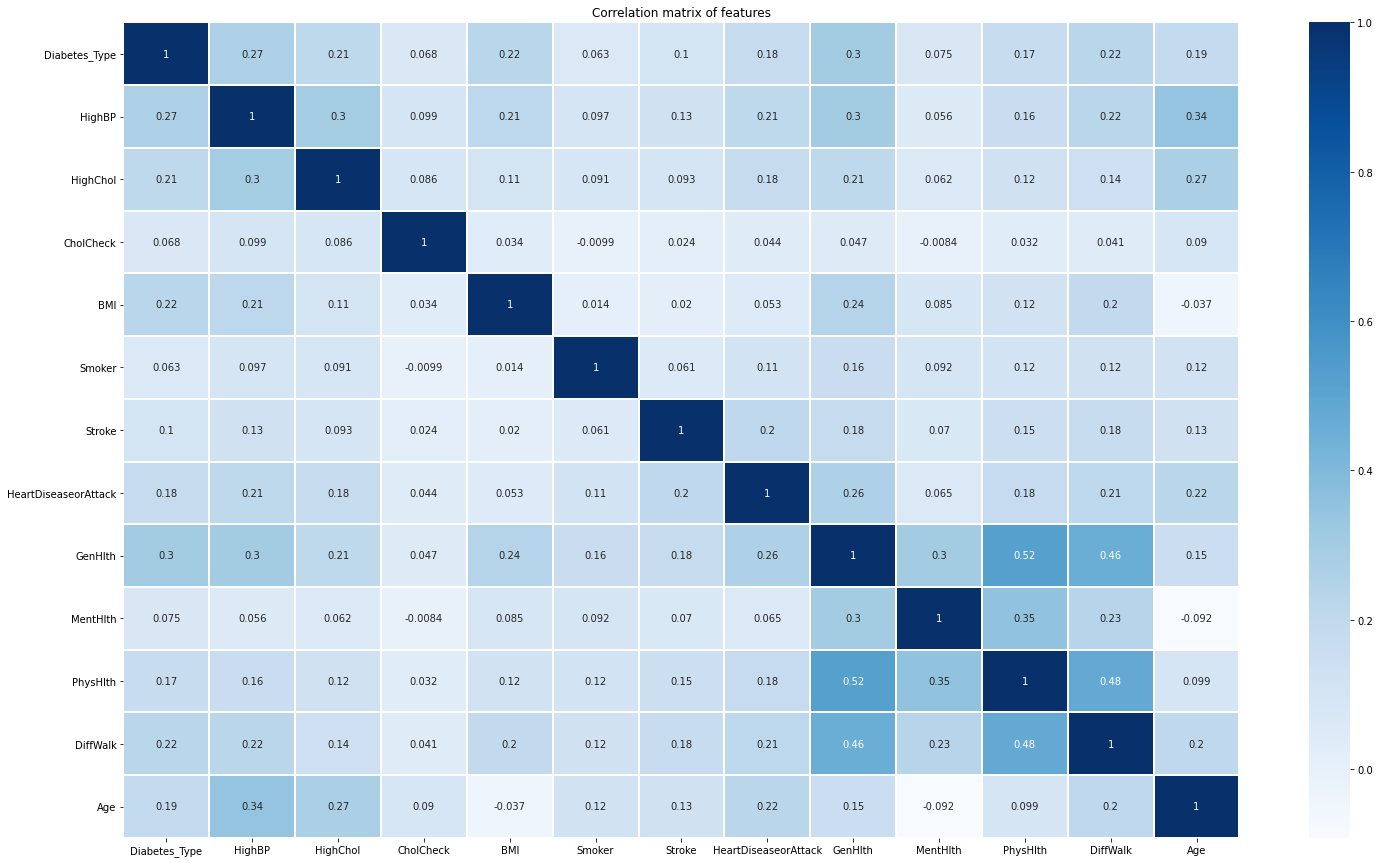

In [32]:
corr = smaller_df.corr()
fig, ax = plt.subplots(figsize=(25,15)) 
sns.heatmap(corr,annot=True, cmap = "Blues", linewidth = 0.30)
plt.title("Correlation matrix of features")
plt.show()

In [33]:
X,y = smaller_df.drop(['Diabetes_Type'],axis=1),smaller_df['Diabetes_Type']
X1,y1 = smaller_df1.drop(['Diabetes_Type'],axis=1),smaller_df1['Diabetes_Type']


## Scalling to give us fair distrubtion btw features

In [34]:
scaler = StandardScaler()
scaler.fit(X)
scaled_features = scaler.transform(X)
X = pd.DataFrame(scaled_features,columns=smaller_df.columns[1:])
X.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,GenHlth,MentHlth,PhysHlth,DiffWalk,Age
0,1.153688,1.165254,0.196922,1.757936,1.120927,-0.205637,-0.322458,2.329121,1.998592,1.233999,2.223615,0.316900
1,-0.866785,-0.858182,-5.078164,-0.511806,1.120927,-0.205637,-0.322458,0.457294,-0.429630,-0.486592,-0.449718,-0.337933
2,1.153688,1.165254,0.196922,-0.057858,-0.892119,-0.205637,-0.322458,2.329121,3.617407,2.954590,2.223615,0.316900
3,1.153688,-0.858182,0.196922,-0.209174,-0.892119,-0.205637,-0.322458,-0.478619,-0.429630,-0.486592,-0.449718,0.971733
4,1.153688,1.165254,0.196922,-0.663122,-0.892119,-0.205637,-0.322458,-0.478619,-0.024926,-0.486592,-0.449718,0.971733


In [35]:
scaler = StandardScaler()
scaler.fit(X1)
scaled_features1 = scaler.transform(X1)
X1 = pd.DataFrame(scaled_features1,columns=smaller_df1.columns[1:])
X1.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,GH,MentHlth,PhysHlth,DiffWalk,Age
0,1.153688,1.165254,0.196922,1.757936,1.120927,-0.205637,-0.322458,-2.329121,1.998592,1.233999,2.223615,0.316900
1,-0.866785,-0.858182,-5.078164,-0.511806,1.120927,-0.205637,-0.322458,-0.457294,-0.429630,-0.486592,-0.449718,-0.337933
2,1.153688,1.165254,0.196922,-0.057858,-0.892119,-0.205637,-0.322458,-2.329121,3.617407,2.954590,2.223615,0.316900
3,1.153688,-0.858182,0.196922,-0.209174,-0.892119,-0.205637,-0.322458,0.478619,-0.429630,-0.486592,-0.449718,0.971733
4,1.153688,1.165254,0.196922,-0.663122,-0.892119,-0.205637,-0.322458,0.478619,-0.024926,-0.486592,-0.449718,0.971733


In [36]:
x_train_val, x_test, y_train_val, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val, test_size=0.20, random_state=42)

x_traing, x_testg, y_traing, y_testg = train_test_split(X1, y1, test_size=0.20, random_state=42)
x_traing, x_valg, y_traing, y_valg = train_test_split(x_traing, y_traing, test_size=0.20, random_state=42)


In [37]:
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(162355, 12)
(40589, 12)
(50736, 12)


# Experiment 1-1: K-nearest Neighbors Classification without using cross vaidation

In [38]:
# create a dict to store the scores of each model
Training_models_evalutions = {'TrainigSet_Models':[],
                     'Accuracy':[],
                     'Precision':[],
                     'Recall':[], 
                     'F1 score':[]}

In [39]:
# create a dict to store the scores of each model
Validation_models_evalutions = {'ValidationSet_Models':[],
                     'Accuracy':[],
                     'Precision':[],
                     'Recall':[], 
                     'F1 score':[]}

In [40]:
x0_train=x_train.copy()
x0_val=x_val.copy()

In [41]:
# Using KNN (smaller df1) train on training set, and Test on testing set 
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x0_train, y_train)
print("The score for kNN without cross val and without using smote is")
print("Training set: {:6.2f}%".format(100*knn.score(x0_train, y_train)))
print("Validation set: {:6.2f}%".format(100*knn.score(x0_val, y_val)))
print("Test set: {:6.2f}%".format(100*knn.score(x_test, y_test)))

The score for kNN without cross val and without using smote is
Training set:  88.10%
Validation set:  82.00%
Test set:  81.94%


In [42]:
'''
# using KNN (smaller df2) train on training set, and Test on testing set
knn1 = KNeighborsClassifier(n_neighbors=5)
knn1.fit(x_train2, y_train2)
print("The score for kNN is")
print("Training set: {:6.2f}%".format(100*knn.score(x_train2, y_train2)))
print("Validation set: {:6.2f}%".format(100*knn.score(x_val2, y_val2)))
print("Test set: {:6.2f}%".format(100*knn.score(x_test2, y_test2)))
'''

'\n# using KNN (smaller df2) train on training set, and Test on testing set\nknn1 = KNeighborsClassifier(n_neighbors=5)\nknn1.fit(x_train2, y_train2)\nprint("The score for kNN is")\nprint("Training set: {:6.2f}%".format(100*knn.score(x_train2, y_train2)))\nprint("Validation set: {:6.2f}%".format(100*knn.score(x_val2, y_val2)))\nprint("Test set: {:6.2f}%".format(100*knn.score(x_test2, y_test2)))\n'

In [43]:
#test the baseline model for smaller df
#prediction
val_pred=knn.predict(x0_val)
#Accuracy
confusion_hard = confusion_matrix( y_val, val_pred)
accuracy = accuracy_score(y_val , val_pred)
precision = precision_score(y_val , val_pred)
recall = recall_score(y_val , val_pred)
f1 = f1_score(y_val,val_pred) 
print('\nKNN Accuracy for validation set=: {0:.4f}, \nprecision: {1:.4f}, \nrecall: {2:.4f},\
\nF1: {3:.4f}'.format(accuracy, precision, recall, f1))


KNN Accuracy for validation set=: 0.8200, 
precision: 0.3973, 
recall: 0.2786,
F1: 0.3275


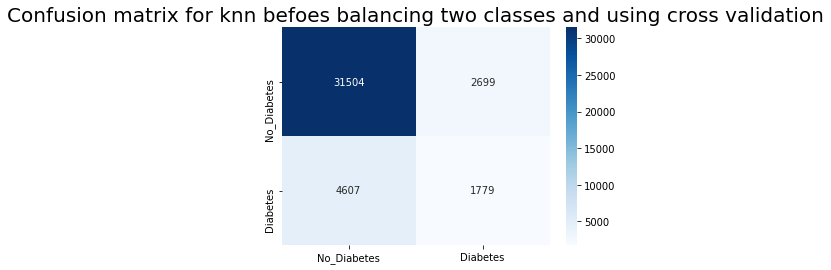

In [44]:
cm = confusion_matrix(y_val, val_pred)
class_label = ["No_Diabetes", "Diabetes"]
df_cm = pd.DataFrame(cm, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d",  cmap = plt.cm.Blues )
plt.title('Confusion matrix for knn befoes balancing two classes and using cross validation', fontsize = 20); # title with fontsize 20

# Experiment 1-2: K-nearest Neighbors Classification with cross validation & Smote

Becouse of our target's labels imbalance we will use Smote to balance them with cross validation.

In [45]:
kf = KFold(n_splits=5, random_state=42, shuffle=True)

In [46]:
knn = KNeighborsClassifier(n_neighbors=5)
accuracy_score1=[]
f1_score1 = []
percision_score1 = []
recall_score1 = []

accuracy_score2=[]
f1_score2 = []
percision_score2 = []
recall_score2 = []

# enumerate the splits and summarize the distributions
for train_ix, test_ix in kf.split(x_train_val, y_train_val):
    # select rows
    train_x, test_X = X.iloc[train_ix], X.iloc[test_ix]
    y_train1, test_y = y.iloc[train_ix], y.iloc[test_ix]
    #print(train_X.shape, train_y.shape)
    #print(test_X.shape, test_y.shape)
    oversample = SMOTE(random_state = 0)
    train_x, y_train1 = oversample.fit_resample(train_x, y_train1)
    #scores= cross_val_score(knn, test_X, test_y, cv=5, scoring='accuracy') 
    knn.fit(train_x, y_train1)
    
    y_traing_pred =knn.predict(train_x)
    
    y_pred =knn.predict(test_X)
    
    #score = f1_score(test_y,y_pred)
    accuracy_score1.append(metrics.accuracy_score(y_train1, y_traing_pred))
    percision_score1.append(metrics.precision_score(y_train1, y_traing_pred))
    recall_score1.append(metrics.recall_score(y_train1, y_traing_pred))
    f1_score1.append(metrics.f1_score(y_train1, y_traing_pred))
    
    accuracy_score2.append(metrics.accuracy_score(test_y, y_pred))
    percision_score2.append(metrics.precision_score(test_y, y_pred))
    recall_score2.append(metrics.recall_score(test_y, y_pred))
    f1_score2.append(metrics.f1_score(test_y, y_pred))

	#pre_scor = precision_score(test_y, y_pred) 
	#pre_score3.append(pre_scor)
	#r = recall_score(test_X, test_y)
	#recall_scor3.append(1)
    
print("kNN Training accuracy score: \t")
print(sum(accuracy_score1) / len(accuracy_score1))
print("----------------")    
print("kNN F1 score: \t")
print(sum(f1_score1) / len(f1_score1))
print("----------------")
conf_mat3 = confusion_matrix(test_y, y_pred)
print("kNN confusion matrix: \n",conf_mat3)
print("----------------")
print("KNN precision score")
print(sum(percision_score1) / len(percision_score1))
print("----------------")
print("KNN recall_score")
print(sum(recall_score1) / len(recall_score1))
print("----------------")
#print score for all evaluations


kNN Training accuracy score: 	
0.8563224065645574
----------------
kNN F1 score: 	
0.8596409947290311
----------------
kNN confusion matrix: 
 [[26673  7491]
 [ 2868  3556]]
----------------
KNN precision score
0.8402142103739868
----------------
KNN recall_score
0.8800432434534559
----------------


In [47]:
Training_models_evalutions['TrainigSet_Models'].append("K-nearest Neighbors Classification")
Training_models_evalutions['Accuracy'].append(accuracy_score(y_train1, y_traing_pred))
Training_models_evalutions['Precision'].append(precision_score(y_train1, y_traing_pred))
Training_models_evalutions['Recall'].append(recall_score(y_train1, y_traing_pred))
Training_models_evalutions['F1 score'].append(f1_score(y_train1, y_traing_pred))

In [48]:
Validation_models_evalutions['ValidationSet_Models'].append("K-nearest Neighbors Classification")
Validation_models_evalutions['Accuracy'].append(accuracy_score(test_y, y_pred))
Validation_models_evalutions['Precision'].append(precision_score(test_y, y_pred))
Validation_models_evalutions['Recall'].append(recall_score(test_y, y_pred))
Validation_models_evalutions['F1 score'].append(f1_score(test_y, y_pred))

In [49]:
knn_final = knn.n_neighbors

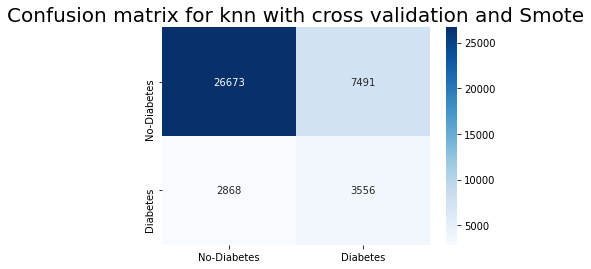

In [50]:
cm =confusion_matrix(test_y, y_pred)
class_label = ["No-Diabetes", "Diabetes"]
df_cm = pd.DataFrame(cm, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d", cmap=plt.cm.Blues)
plt.title('Confusion matrix for knn with cross validation and Smote', fontsize = 20); # title with fontsize 20

In [51]:
'''
def score_model(model, params, cv=None):
    if cv is None:
        cv = KFold(n_splits=5, random_state=42)
        smoter = SMOTE(random_state=42)
        scores = 0

    for train_fold_index, val_fold_index in cv.split(x, y):
        
        x_train_fold, y_train_fold = x.iloc[train_fold_index], y[train_fold_index]
        
        x_val_fold, y_val_fold = x.iloc[val_fold_index], y[val_fold_index]
        
        x_train_fold_upsample, y_train_fold_upsample = smoter.fit_resample(x_train_fold, y_train_fold)
        
        model_obj = model(**params).fit(x_train_fold_upsample, y_train_fold_upsample)
        
        score_recall = recall_score(y_val_fold, model_obj.predict(x_val_fold))
        
            #score_percision=precision_score(y_val_fold, model_obj.predict(x_val_fold)) 
            #score_recall= recall_score(y_val_fold, model_obj.predict(x_val_fold)) 
            #score_f1=f1_score(y_val_fold, model_obj.predict(x_val_fold))
            #print('accuracy_score): {}'.format(score_accuracy))
            #print('precision_score: {}'.format(score_percision))
            #print('recall_score: {}'.format(score_recall))
            #print('f1 score: {}'.format(score_f1))
        scores.append(score_recall)
#print("The model is:{:6.2f}%".format(model))
    return np.array(scores)
kf = KFold(n_splits=5, random_state=42, shuffle=True)
params1 = {'n_neighbors':3}
params2 = {'n_estimators': 50,'max_depth':4 ,'random_state': 13}

k=score_model(RandomForestClassifier, params2, cv=kf)
print (k)    
'''

'\ndef score_model(model, params, cv=None):\n    if cv is None:\n        cv = KFold(n_splits=5, random_state=42)\n        smoter = SMOTE(random_state=42)\n        scores = 0\n\n    for train_fold_index, val_fold_index in cv.split(x, y):\n        \n        x_train_fold, y_train_fold = x.iloc[train_fold_index], y[train_fold_index]\n        \n        x_val_fold, y_val_fold = x.iloc[val_fold_index], y[val_fold_index]\n        \n        x_train_fold_upsample, y_train_fold_upsample = smoter.fit_resample(x_train_fold, y_train_fold)\n        \n        model_obj = model(**params).fit(x_train_fold_upsample, y_train_fold_upsample)\n        \n        score_recall = recall_score(y_val_fold, model_obj.predict(x_val_fold))\n        \n            #score_percision=precision_score(y_val_fold, model_obj.predict(x_val_fold)) \n            #score_recall= recall_score(y_val_fold, model_obj.predict(x_val_fold)) \n            #score_f1=f1_score(y_val_fold, model_obj.predict(x_val_fold))\n            #print(\'

# Expreiment 2: Logistic Regression Model with smote

In [52]:
x2_train=x_train.copy()
x2_val=x_val.copy()

x2_traing=x_traing.copy()
x2_valg=x_valg.copy()

In [53]:
#Before balance classes
lr=LogisticRegression()
prams ={"penalty": [ 'l1', 'l2'],
       "C": [0.5 , 0.7,0.8 , 1 , 2.0 , 3.0]}

lr_cv= GridSearchCV(lr , param_grid=prams, n_jobs=-1 ,cv=10)
lr_cv.fit(x2_train , y_train )

print("Best params: ", lr_cv.best_params_)
print("Best estimator: " ,lr_cv.best_estimator_)
print("Best score: ", lr_cv.best_score_)

print("Training Score before balance the labels:",lr_cv.score(x2_train, y_train))
print("Validation Score before balance the labels:",lr_cv.score(x2_val, y_val))

y_pred = lr_cv.predict(x2_val)
print("\nLogistic Regression Accuracy=",accuracy_score(y_val, y_pred))
print("Logistic Regression F1 score=",f1_score(y_val, y_pred))

Best params:  {'C': 0.5, 'penalty': 'l2'}
Best estimator:  LogisticRegression(C=0.5)
Best score:  0.846613907749515
Training Score before balance the labels: 0.8465707862400296
Validation Score before balance the labels: 0.8495897903372835

Logistic Regression Accuracy= 0.8495897903372835
Logistic Regression F1 score= 0.27226129455239


In [54]:
lr_cv.best_score_

0.846613907749515

In [55]:
lr_final = lr_cv.best_estimator_
lr_final

LogisticRegression(C=0.5)

In [56]:
lr_final.score(x2_train , y_train)

0.8465707862400296

In [57]:
lr_final.score(x_val , y_val)

0.8495897903372835

The Class Imbalance classification divided into three:

> 1. Before model training: Resampling strategies (oversampling, undersampling)

> 2. During model training: Training with adjusted class weights

> 3. After model training: Adjusting the decision threshold (F1 optimization strategy)

# Experiment2-1 with random over sampling

In [58]:
lg1 = LogisticRegression(C=0.5,penalty="l2")

# randomly oversample positive samples
ROS = RandomOverSampler(random_state=42)

X_tr_rs, y_tr_rs = ROS.fit_resample(x2_train, y_train)

lg1.fit(X_tr_rs, y_tr_rs)
print("Training Score after balance the labels (RandomOverSampler):",lg1.score(X_tr_rs, y_tr_rs))
print("Validation Score after balance the labels (RandomOverSampler)",lg1.score(x_val, y_val))
#model_eval(model3,X_test_std,y_test)

Training Score after balance the labels (RandomOverSampler): 0.7389744340002194
Validation Score after balance the labels (RandomOverSampler) 0.7266993520411934


# Experiment2-2 whith random under sampling


In [59]:
lg2 = LogisticRegression(C=0.5,penalty="l2")

RUS = RandomUnderSampler(random_state=42)

X_tr_us, y_tr_us = RUS.fit_resample(x2_train, y_train)

lg2.fit(X_tr_us, y_tr_us)
print("Training Score after balance the labels (RandomUnderSampler)",lg2.score(X_tr_us, y_tr_us))
print("Validation Score after balance the labels (RandomUnderSampler):",lg2.score(x2_val, y_val))
#model_eval(lg2,X_test_std,y_test)

Training Score after balance the labels (RandomUnderSampler) 0.7384795321637427
Validation Score after balance the labels (RandomUnderSampler): 0.7292369853901304


# Experiment2-3 whith balanced weighted classes sampling


In [60]:
lg3 = LogisticRegression(C=0.5,penalty="l2",class_weight='balanced')

lg3.fit(x2_train, y_train)
#y_pred=lg3.predict(x2_val)
print("Training Score after Balanced class weights Logistic Regression",lg3.score(x2_train, y_train))
print("Validation Score after Balanced class weights Logistic Regression:",lg3.score(x2_val, y_val))


Training Score after Balanced class weights Logistic Regression 0.726408179606418
Validation Score after Balanced class weights Logistic Regression: 0.7270689102958929


# Experiment2-4 whith Smote

In [61]:
lg = LogisticRegression(C=0.5,penalty="l2")

SMT = SMOTE(random_state=42)

X_tr_smt, y_tr_smt = SMT.fit_resample(x2_train, y_train)

lg.fit(X_tr_smt, y_tr_smt)
y_traing_pred=lg.predict(X_tr_smt)
y_pred=lg.predict(x2_val)

print("Training Score after balance the labels (Smote):",lg.score(X_tr_smt, y_tr_smt))
print("Validation Score after balance the labels (Smote):",lg.score(x2_val, y_val))
#model_eval(model3,X_test_std,y_test)

Training Score after balance the labels (Smote): 0.7419809077941553
Validation Score after balance the labels (Smote): 0.7282268594939516


In [62]:
'''
#experiment2-4 whith Smote
lg1 = LogisticRegression(C=1,penalty="l2")

SMT1 = SMOTE(random_state=42)

X_tr_smtg, y_tr_smtg = SMT1.fit_resample(x2_traing, y_traing)

lg1.fit(X_tr_smtg, y_tr_smtg)
y_traing_predg1=lg.predict(X_tr_smtg)
print("After encoding Training Score after balance the labels (Smote):",lg.score(X_tr_smtg, y_tr_smtg))
print("After encoding Validation Score after balance the labels (Smote):",lg.score(x2_valg, y_valg))
'''

'\n#experiment2-4 whith Smote\nlg1 = LogisticRegression(C=1,penalty="l2")\n\nSMT1 = SMOTE(random_state=42)\n\nX_tr_smtg, y_tr_smtg = SMT1.fit_resample(x2_traing, y_traing)\n\nlg1.fit(X_tr_smtg, y_tr_smtg)\ny_traing_predg1=lg.predict(X_tr_smtg)\nprint("After encoding Training Score after balance the labels (Smote):",lg.score(X_tr_smtg, y_tr_smtg))\nprint("After encoding Validation Score after balance the labels (Smote):",lg.score(x2_valg, y_valg))\n'

the best result was for Smote 

In [63]:
Training_models_evalutions['TrainigSet_Models'].append("LogisticRegression")
Training_models_evalutions['Accuracy'].append(accuracy_score(y_tr_smt, y_traing_pred))
Training_models_evalutions['Precision'].append(precision_score(y_tr_smt, y_traing_pred))
Training_models_evalutions['Recall'].append(recall_score(y_tr_smt, y_traing_pred))
Training_models_evalutions['F1 score'].append(f1_score(y_tr_smt, y_traing_pred))

In [64]:
'''
Validation_models_evalutions['ValidationSet_Models'].append("LogisticRegression after encoding")
Validation_models_evalutions['Accuracy'].append(accuracy_score(y_tr_smtg, y_traing_predg1))
Validation_models_evalutions['Precision'].append(precision_score(y_tr_smtg, y_traing_predg1))
Validation_models_evalutions['Recall'].append(recall_score(y_tr_smtg, y_traing_predg1))
Validation_models_evalutions['F1 score'].append(f1_score(y_tr_smtg, y_traing_predg1))
'''

'\nValidation_models_evalutions[\'ValidationSet_Models\'].append("LogisticRegression after encoding")\nValidation_models_evalutions[\'Accuracy\'].append(accuracy_score(y_tr_smtg, y_traing_predg1))\nValidation_models_evalutions[\'Precision\'].append(precision_score(y_tr_smtg, y_traing_predg1))\nValidation_models_evalutions[\'Recall\'].append(recall_score(y_tr_smtg, y_traing_predg1))\nValidation_models_evalutions[\'F1 score\'].append(f1_score(y_tr_smtg, y_traing_predg1))\n'

In [65]:
Validation_models_evalutions['ValidationSet_Models'].append("LogisticRegression")
Validation_models_evalutions['Accuracy'].append(accuracy_score(y_val, y_pred))
Validation_models_evalutions['Precision'].append(precision_score(y_val, y_pred))
Validation_models_evalutions['Recall'].append(recall_score(y_val, y_pred))
Validation_models_evalutions['F1 score'].append(f1_score(y_val, y_pred))

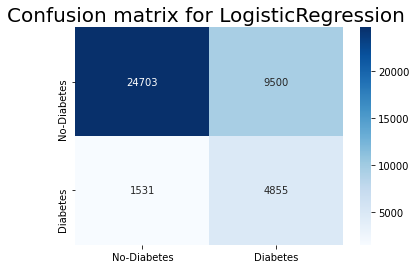

In [66]:
# plotting confusion mtrix
cm = confusion_matrix(y_val, y_pred)
class_label = ["No-Diabetes", "Diabetes"]
df_cm = pd.DataFrame(cm, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d", cmap='Blues')
plt.title('Confusion matrix for LogisticRegression ', fontsize = 20); # title with fontsize 20

# Experiment 3: Decision Tree Classification

we will use here the ( x_train and y_train ) after balanced in Smote

In [67]:
x3_train=x_train.copy()
x3_val=x_val.copy()

In [68]:
# finding the best parameters for the decision tree
param_grid = {'criterion' :['gini', 'entropy'],'max_depth': [4, 6, 10, 12]}

tree_clas = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(estimator=tree_clas, param_grid=param_grid, cv=5, verbose=True)
grid_search.fit(x3_train, y_train)

print(grid_search.best_estimator_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=42)


In [69]:
Dt_final = grid_search.best_estimator_
Dt_final

DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=42)

In [70]:
# trying with entropy, since it didn't show in the previose step
tree = DecisionTreeClassifier(criterion='entropy',
                                     max_depth=6,
                                     max_features='auto',
                                     random_state=42)

tree.fit(x3_train,y_train)

print("Training Score In Decision Tree Classification:",tree.score(x3_train, y_train))
print("Validation Score In Decision Tree: Classification",tree.score(x2_val, y_val))
y_traing_pred = tree.predict(x3_train)

y_pred = tree.predict(x3_val)

print("DT Accuracy=",accuracy_score(y_val, y_pred))
print("DT F1 score=",f1_score(y_val, y_pred))

Training Score In Decision Tree Classification: 0.8475870777001017
Validation Score In Decision Tree: Classification 0.8490970459976841
DT Accuracy= 0.8490970459976841
DT F1 score= 0.275233700153828


In [71]:
Training_models_evalutions['TrainigSet_Models'].append("Decision Tree Classification")
Training_models_evalutions['Accuracy'].append(accuracy_score(y_train, y_traing_pred))
Training_models_evalutions['Precision'].append(precision_score(y_train, y_traing_pred))
Training_models_evalutions['Recall'].append(recall_score(y_train, y_traing_pred))
Training_models_evalutions['F1 score'].append(f1_score(y_train, y_traing_pred))

In [72]:
Validation_models_evalutions['ValidationSet_Models'].append("Decision Tree Classification")
Validation_models_evalutions['Accuracy'].append(accuracy_score(y_val, y_pred))
Validation_models_evalutions['Precision'].append(precision_score(y_val, y_pred))
Validation_models_evalutions['Recall'].append(recall_score(y_val, y_pred))
Validation_models_evalutions['F1 score'].append(f1_score(y_val, y_pred))

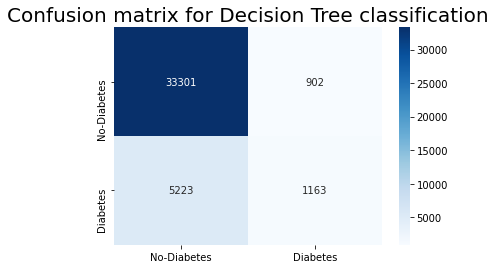

In [73]:
# plotting confusion mtrix
cm = confusion_matrix(y_val, y_pred)
class_label = ["No-Diabetes", "Diabetes"]
df_cm = pd.DataFrame(cm, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d", cmap='Blues')
plt.title('Confusion matrix for Decision Tree classification', fontsize = 20); # title with fontsize 20

# Expreiment 4: Random Forest Classification 

In [74]:
x4_train=x_train.copy()
x4_val=x_val.copy()

In [75]:
params = {
    'n_estimators': [50, 100],
    'max_depth': [4, 6, 10, 12],
    'random_state': [13]
}

In [76]:
#kf = KFold(n_splits=5, random_state=42, shuffle=False)
example_params = {
        'n_estimators': 50,
        'max_depth':4 ,
        'random_state': 13
    }
    

In [77]:
imba_pipeline = make_pipeline(SMOTE(random_state=42),RandomForestClassifier(n_estimators=5, random_state=13))
cross_val_score(imba_pipeline, x4_train, y_train, cv=kf)

array([0.78802624, 0.79486311, 0.79129069, 0.78941209, 0.78959687])

In [78]:
new_params = {'randomforestclassifier__' + key: params[key] for key in params}
grid_imba = GridSearchCV(imba_pipeline, param_grid=new_params, cv=kf,return_train_score=True)
grid_imba.fit(x4_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('smote', SMOTE(random_state=42)),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(n_estimators=5,
                                                               random_state=13))]),
             param_grid={'randomforestclassifier__max_depth': [4, 6, 10, 12],
                         'randomforestclassifier__n_estimators': [50, 100],
                         'randomforestclassifier__random_state': [13]},
             return_train_score=True)

In [79]:
print("Training Score In Random Forest Classification:",grid_imba.score(x4_train, y_train))
print("Validation Score In Random Forest Classification:",grid_imba.score(x4_val, y_val))

Training Score In Random Forest Classification: 0.7722213667580302
Validation Score In Random Forest Classification: 0.7596639483603932


In [80]:
rf_best=grid_imba.best_params_
rf_best

{'randomforestclassifier__max_depth': 12,
 'randomforestclassifier__n_estimators': 100,
 'randomforestclassifier__random_state': 13}

In [81]:
# Random Forest with best hyperparameter
rf_best = RandomForestClassifier(n_estimators=100,
                                 max_depth=12,
                                 random_state=13)
rf_best.fit(x4_train, y_train)

y_traing_pred = rf_best.predict(x4_train)

y_pred = rf_best.predict(x4_val)


In [82]:
print("Training Score In Random Forest Classification with best parameters:",rf_best.score(x4_train, y_train))
print("Validation Score In Random Forest Classification:with best parameters",rf_best.score(x4_val, y_val))

Training Score In Random Forest Classification with best parameters: 0.8622401527516861
Validation Score In Random Forest Classification:with best parameters 0.8518810515164207


In [83]:
Training_models_evalutions['TrainigSet_Models'].append('RandomForestClassifier')
Training_models_evalutions['Accuracy'].append(accuracy_score(y_train, y_traing_pred))
Training_models_evalutions['Precision'].append(precision_score(y_train, y_traing_pred))
Training_models_evalutions['Recall'].append(recall_score(y_train, y_traing_pred))
Training_models_evalutions['F1 score'].append(f1_score(y_train, y_traing_pred))

In [84]:
Validation_models_evalutions['ValidationSet_Models'].append("RandomForestClassifier")
Validation_models_evalutions['Accuracy'].append(accuracy_score(y_val, y_pred))
Validation_models_evalutions['Precision'].append(precision_score(y_val, y_pred))
Validation_models_evalutions['Recall'].append(recall_score(y_val, y_pred))
Validation_models_evalutions['F1 score'].append(f1_score(y_val, y_pred))

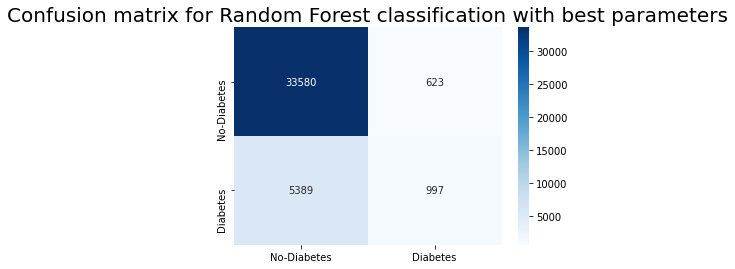

In [85]:
# plotting confusion mtrix
cm = confusion_matrix(y_val, y_pred)
class_label = ["No-Diabetes", "Diabetes"]
df_cm = pd.DataFrame(cm, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d", cmap='Blues');
plt.title('Confusion matrix for Random Forest classification with best parameters', fontsize = 20); # title with fontsize 20

# Experiment 5-1: Ensembling with Voting

In [86]:
x5_train=x_train.copy()
x5_val=x_val.copy()

In [87]:
model_names = ["rf_best","Dt_final"]

model_vars = [eval(n) for n in model_names]
model_list = list(zip(model_names, model_vars))

In [88]:
model_names

['rf_best', 'Dt_final']

In [89]:
model_list

[('rf_best', RandomForestClassifier(max_depth=12, random_state=13)),
 ('Dt_final',
  DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=42))]

In [90]:
for model_name in model_names:
    curr_model = eval(model_name)
    print(f'{model_name} score: {curr_model.score(x5_val, y_val)}')

rf_best score: 0.8518810515164207
Dt_final score: 0.8494173298184237


In [91]:
# create voting classifier
voting_classifer = VotingClassifier(estimators=model_list,voting='hard', n_jobs=-1)
voting_classifer.fit(x5_train, y_train)

VotingClassifier(estimators=[('rf_best',
                              RandomForestClassifier(max_depth=12,
                                                     random_state=13)),
                             ('Dt_final',
                              DecisionTreeClassifier(criterion='entropy',
                                                     max_depth=6,
                                                     random_state=42))],
                 n_jobs=-1)

In [92]:
# get accuracy (model to beat: RF with 0.8136 accuracy)
y_traing_pred=voting_classifer.predict(x5_train)
y_pred = voting_classifer.predict(x5_val)

In [93]:
print("Training Score In Hard Voting and select the best model scores(DT& RF))",voting_classifer.score(x5_train, y_train))
print("Training Score In HRD Voting and select the best model scores(DT& RF))",voting_classifer.score(x5_val, y_val))

Training Score In Hard Voting and select the best model scores(DT& RF)) 0.8518678205167688
Training Score In HRD Voting and select the best model scores(DT& RF)) 0.8501318091108429


In [94]:
Training_models_evalutions['TrainigSet_Models'].append("VotingClassifier-Hard")
Training_models_evalutions['Accuracy'].append(accuracy_score(y_train, y_traing_pred))
Training_models_evalutions['Precision'].append(precision_score(y_train, y_traing_pred))
Training_models_evalutions['Recall'].append(recall_score(y_train, y_traing_pred))
Training_models_evalutions['F1 score'].append(f1_score(y_train, y_traing_pred))

In [95]:
Validation_models_evalutions['ValidationSet_Models'].append("VotingClassifier-Hard")
Validation_models_evalutions['Accuracy'].append(accuracy_score(y_val, y_pred))
Validation_models_evalutions['Precision'].append(precision_score(y_val, y_pred))
Validation_models_evalutions['Recall'].append(recall_score(y_val, y_pred))
Validation_models_evalutions['F1 score'].append(f1_score(y_val, y_pred))

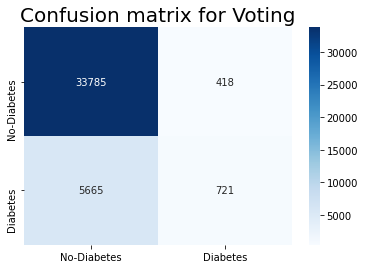

In [96]:
# plotting confusion mtrix
cm = confusion_matrix(y_val, y_pred)
class_label = ["No-Diabetes", "Diabetes"]
df_cm = pd.DataFrame(cm, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d", cmap='Blues')
plt.title('Confusion matrix for Voting', fontsize = 20); # title with fontsize 20

# Experiment 5-2: Ensembling with Average Voting

In [97]:
x7_train=x_train.copy()
x7_val=x_val.copy()

In [98]:
# create voting classifier
voting_classifer = VotingClassifier(estimators=model_list,voting='soft', n_jobs=-1)
voting_classifer.fit(x7_train, y_train)

VotingClassifier(estimators=[('rf_best',
                              RandomForestClassifier(max_depth=12,
                                                     random_state=13)),
                             ('Dt_final',
                              DecisionTreeClassifier(criterion='entropy',
                                                     max_depth=6,
                                                     random_state=42))],
                 n_jobs=-1, voting='soft')

In [99]:
print("Training Score In Average Voting and select the best model scores(DT& RF))",voting_classifer.score(x7_train, y_train))
print("Training Score In Avaerage Voting and select the best model scores(DT& RF))",voting_classifer.score(x7_val, y_val))

Training Score In Average Voting and select the best model scores(DT& RF)) 0.8542145298882079
Training Score In Avaerage Voting and select the best model scores(DT& RF)) 0.8508462884032619


In [100]:
# Get accuracy (model to beat: RF with 0.8136 accuracy)
y_traing_pred=voting_classifer.predict(x7_train)
y_pred = voting_classifer.predict(x7_val)

In [101]:
Training_models_evalutions['TrainigSet_Models'].append("VotingClassifier-Average Voting")
Training_models_evalutions['Accuracy'].append(accuracy_score(y_train, y_traing_pred))
Training_models_evalutions['Precision'].append(precision_score(y_train, y_traing_pred))
Training_models_evalutions['Recall'].append(recall_score(y_train, y_traing_pred))
Training_models_evalutions['F1 score'].append(f1_score(y_train, y_traing_pred))

In [102]:
Validation_models_evalutions['ValidationSet_Models'].append("VotingClassifier-Average Voting")
Validation_models_evalutions['Accuracy'].append(accuracy_score(y_val, y_pred))
Validation_models_evalutions['Precision'].append(precision_score(y_val, y_pred))
Validation_models_evalutions['Recall'].append(recall_score(y_val, y_pred))
Validation_models_evalutions['F1 score'].append(f1_score(y_val, y_pred))

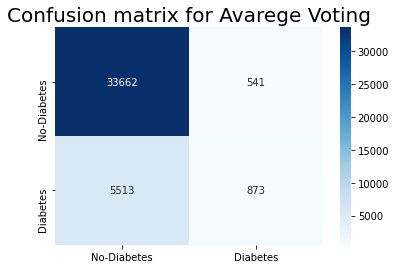

In [103]:
# plotting confusion mtrix
cm = confusion_matrix(y_val, y_pred)
class_label = ["No-Diabetes", "Diabetes"]
df_cm = pd.DataFrame(cm, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d", cmap='Blues')
plt.title('Confusion matrix for Avarege Voting', fontsize = 20); # title with fontsize 20

# Experiment 5-3: Ensembling with Weighted Voting

In [104]:
x8_train=x_train.copy()
x8_val=x_val.copy()

In [105]:
# create voting classifier
weights = [1.5,3.8]
voting_model = VotingClassifier(estimators=model_list, voting='soft', weights = weights, n_jobs=-1)
voting_model.fit(x8_train, y_train)

VotingClassifier(estimators=[('rf_best',
                              RandomForestClassifier(max_depth=12,
                                                     random_state=13)),
                             ('Dt_final',
                              DecisionTreeClassifier(criterion='entropy',
                                                     max_depth=6,
                                                     random_state=42))],
                 n_jobs=-1, voting='soft', weights=[1.5, 3.8])

In [106]:
# Get accuracy (model to beat: RF with 0.8136 accuracy)
y_traing_pred= voting_model.predict(x8_train)
y_pred = voting_model.predict(x8_val)

In [107]:
print("Training Score In Weighted Voting and select the best model scores(DT& RF))",voting_model.score(x7_train, y_train))
print("Training Score In Weighted Voting and select the best model scores(DT& RF))",voting_model.score(x7_val, y_val))

Training Score In Weighted Voting and select the best model scores(DT& RF)) 0.8509192818207015
Training Score In Weighted Voting and select the best model scores(DT& RF)) 0.850008623025943


In [108]:
Training_models_evalutions['TrainigSet_Models'].append("VotingClassifier-Weighted Voting")
Training_models_evalutions['Accuracy'].append(accuracy_score(y_train, y_traing_pred))
Training_models_evalutions['Precision'].append(precision_score(y_train, y_traing_pred))
Training_models_evalutions['Recall'].append(recall_score(y_train, y_traing_pred))
Training_models_evalutions['F1 score'].append(f1_score(y_train, y_traing_pred))

In [109]:
Validation_models_evalutions['ValidationSet_Models'].append("VotingClassifier-Weighted Voting")
Validation_models_evalutions['Accuracy'].append(accuracy_score(y_val, y_pred))
Validation_models_evalutions['Precision'].append(precision_score(y_val, y_pred))
Validation_models_evalutions['Recall'].append(recall_score(y_val, y_pred))
Validation_models_evalutions['F1 score'].append(f1_score(y_val, y_pred))

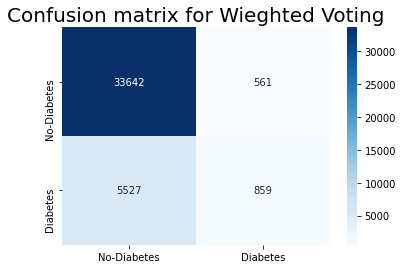

In [110]:
# plotting confusion mtrix
cm = confusion_matrix(y_val, y_pred)
class_label = ["No-Diabetes", "Diabetes"]
df_cm = pd.DataFrame(cm, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d", cmap='Blues')
plt.title('Confusion matrix for Wieghted Voting', fontsize = 20); # title with fontsize 20

# Experiment 6: XGBReegressor Classification

In [111]:
x11_train=X_tr_smt.copy()
y_train=y_tr_smt.copy()
x11_val=x_val.copy()

In [112]:
import xgboost
from sklearn.model_selection import RandomizedSearchCV


In [113]:
params = { 'max_depth': [3, 6, 10, 15, 20],
           'learning_rate': [0.01, 0.1, 0.2, 0.3],
           'subsample': np.arange(0.5, 1.0, 0.1),
           'colsample_bytree': np.arange(0.4, 1.0, 0.1),
           'colsample_bylevel': np.arange(0.4, 1.0, 0.1),
           'n_estimators': [50,100],
         'objective': ['binary:logistic']}

xgbc = xgboost.XGBClassifier(seed = 20)

rs = RandomizedSearchCV(estimator=xgbc, 
                   param_distributions=params,
                   cv = 5,
                   scoring='f1', 
                   verbose=1,
                   n_iter=25)

rs.fit(x11_train, y_train, eval_metric= 'logloss')
rs.best_params_

Fitting 5 folds for each of 25 candidates, totalling 125 fits


{'subsample': 0.5,
 'objective': 'binary:logistic',
 'n_estimators': 100,
 'max_depth': 15,
 'learning_rate': 0.01,
 'colsample_bytree': 0.7999999999999999,
 'colsample_bylevel': 0.5}

In [114]:
xgbc = xgboost.XGBClassifier(subsample=0.8,
                         objective='binary:logistic',
                         n_estimators=100,
                         max_depth=15,
                        learning_rate=0.01,
                        colsample_bytree=0.8,
                        colsample_bylevel=0.6
                        )

xgbc.fit(x11_train,y_train,eval_metric= 'logloss')

y_traing_pred = xgbc.predict(x11_train)

y_pred = xgbc.predict(x11_val)

print("xgbc Accuracy=",accuracy_score(y_val, y_pred))
print("xgbc F1 score=",f1_score(y_val, y_pred))

xgbc Accuracy= 0.8037645667545394
xgbc F1 score= 0.46846846846846846


In [115]:
Training_models_evalutions['TrainigSet_Models'].append("XGBReegressor")
Training_models_evalutions['Accuracy'].append(accuracy_score(y_train, y_traing_pred))
Training_models_evalutions['Precision'].append(precision_score(y_train, y_traing_pred))
Training_models_evalutions['Recall'].append(recall_score(y_train, y_traing_pred))
Training_models_evalutions['F1 score'].append(f1_score(y_train, y_traing_pred))

In [116]:
Validation_models_evalutions['ValidationSet_Models'].append("XGBReegressor")
Validation_models_evalutions['Accuracy'].append(accuracy_score(y_val, y_pred))
Validation_models_evalutions['Recall'].append(recall_score(y_val, y_pred))
Validation_models_evalutions['Precision'].append(precision_score(y_val, y_pred))
Validation_models_evalutions['F1 score'].append(f1_score(y_val, y_pred))

<AxesSubplot:>

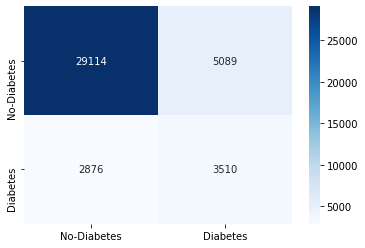

In [117]:
# plotting confusion mtrix
cm = confusion_matrix(y_val, y_pred)
class_label = ["No-Diabetes", "Diabetes"]
df_cm = pd.DataFrame(cm, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d", cmap='Blues')

# Experiment 5-4: Ensembling with Stacking

In [118]:
x9_train=X_tr_smt.copy()
y_train=y_tr_smt.copy()
x9_val=x_val.copy()

In [119]:
import xgboost

from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import StackingClassifier

In [121]:
estimators = [
     ('rf', RandomForestClassifier(n_estimators=100,
                                 max_features='sqrt',
                                 max_depth=12,
                                 bootstrap=True)),
    ('xgb', xgboost.XGBClassifier(subsample=0.8,
                         objective='binary:logistic',
                         n_estimators=100,
                         max_depth=15,
                        learning_rate=0.01,
                        colsample_bytree=0.8,
                        colsample_bylevel=0.6
                        ))
 ]
clf = StackingClassifier(
     estimators=estimators, final_estimator=LogisticRegression()
 )


clf.fit(x9_train, y_train)

y_traing_pred = clf.predict(x9_train)

y_pred = clf.predict(x9_val)

print("SC Accuracy=",accuracy_score(y_val, y_pred))
print("SC F1 score=",f1_score(y_val, y_pred))

[22:03:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:05:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:05:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:06:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [122]:
Training_models_evalutions['TrainigSet_Models'].append("StackingClassifier")
Training_models_evalutions['Accuracy'].append(accuracy_score(y_train, y_traing_pred))
Training_models_evalutions['Precision'].append(precision_score(y_train, y_traing_pred))
Training_models_evalutions['Recall'].append(recall_score(y_train, y_traing_pred))
Training_models_evalutions['F1 score'].append(f1_score(y_train, y_traing_pred))

In [123]:
Validation_models_evalutions['ValidationSet_Models'].append("StackingClassifier")
Validation_models_evalutions['Accuracy'].append(accuracy_score(y_val, y_pred))
Validation_models_evalutions['Precision'].append(precision_score(y_val, y_pred))
Validation_models_evalutions['Recall'].append(recall_score(y_val, y_pred))
Validation_models_evalutions['F1 score'].append(f1_score(y_val, y_pred))

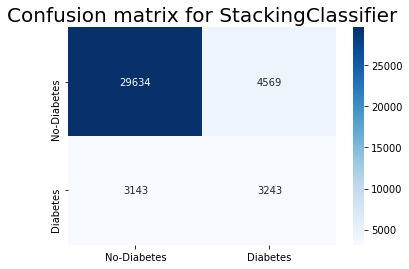

In [124]:
# plotting confusion mtrix
cm = confusion_matrix(y_val, y_pred)
class_label = ["No-Diabetes", "Diabetes"]
df_cm = pd.DataFrame(cm, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d", cmap='Blues')
plt.title('Confusion matrix for StackingClassifier', fontsize = 20); # title with fontsize 20

# Excepriment 7:Gradient Boosting

In [125]:
#using a copy of (x_train and y_train) after balanced with Smote
x10_train=X_tr_smt.copy()
y_train=y_tr_smt.copy()
x10_val=x_val.copy()

In [126]:

gbm_model1 = ["knn_final","rf_best","Dt_final"]

model_vars1 = [eval(n) for n in gbm_model1]
model_list = list(zip(gbm_model1, model_vars1))

In [128]:
gbm_model = GradientBoostingClassifier()
# Model Tuning
gbm_params = {"learning_rate": [0.01, 0.1],
               "max_depth": [10 , 1],
               "n_estimators": [50,100],
               "subsample": [1, 0.5, 0.8]}
gbm_cv_model = GridSearchCV(gbm_model,
                            gbm_params,
                            cv=10,
                            n_jobs=-1,
                            verbose=2).fit(x10_train, y_train)
gbm_cv_model.best_params_

Fitting 10 folds for each of 24 candidates, totalling 240 fits


{'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 100, 'subsample': 0.8}

In [129]:
# Final Model with best parameter
gbm_tuned = GradientBoostingClassifier(**gbm_cv_model.best_params_).fit(x10_train,y_train)

y_traing_pred = gbm_tuned.predict(x10_train)

y_pred = clf.predict(x10_val)

print("SC Accuracy=",accuracy_score(y_val, y_pred))
print("SC F1 score=",f1_score(y_val, y_pred))

SC Accuracy= 0.8099977826504718
SC F1 score= 0.4568249049161853


In [130]:
Training_models_evalutions['TrainigSet_Models'].append("GradientBoosting")
Training_models_evalutions['Accuracy'].append(accuracy_score(y_train, y_traing_pred))
Training_models_evalutions['Precision'].append(precision_score(y_train, y_traing_pred))
Training_models_evalutions['Recall'].append(recall_score(y_train, y_traing_pred))
Training_models_evalutions['F1 score'].append(f1_score(y_train, y_traing_pred))

In [131]:
Validation_models_evalutions['ValidationSet_Models'].append("GradientBoosting")
Validation_models_evalutions['Accuracy'].append(accuracy_score(y_val, y_pred))
Validation_models_evalutions['Precision'].append(precision_score(y_val, y_pred))
Validation_models_evalutions['Recall'].append(recall_score(y_val, y_pred))
Validation_models_evalutions['F1 score'].append(f1_score(y_val, y_pred))

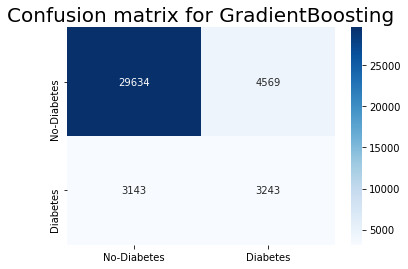

In [132]:
# plotting confusion mtrix
cm = confusion_matrix(y_val, y_pred)
class_label = ["No-Diabetes", "Diabetes"]
df_cm = pd.DataFrame(cm, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d", cmap='Blues')
plt.title('Confusion matrix for GradientBoosting', fontsize = 20); # title with fontsize 20

# Conculsion

In [133]:
TrainigSet_results = pd.DataFrame.from_dict(Training_models_evalutions)
TrainigSet_results

,TrainigSet_Models,Accuracy,Precision,Recall,F1 score
0,K-nearest Neighbors Classification,0.857260,0.841225,0.880756,0.860537
1,LogisticRegression,0.741981,0.732876,0.761530,0.746928
2,Decision Tree Classification,0.847587,0.554224,0.180312,0.272099
3,RandomForestClassifier,0.862240,0.729522,0.203470,0.318193
4,VotingClassifier-Hard,0.851868,0.670867,0.122456,0.207108
5,VotingClassifier-Average Voting,0.854215,0.665331,0.155400,0.251952
6,VotingClassifier-Weighted Voting,0.850919,0.622667,0.143080,0.232691
7,XGBReegressor,0.864888,0.861611,0.869420,0.865497
8,StackingClassifier,0.872627,0.874410,0.870246,0.872323
9,GradientBoosting,0.890512,0.913005,0.863282,0.887448


In [134]:
ValidationSet_results = pd.DataFrame.from_dict(Validation_models_evalutions)
ValidationSet_results

,ValidationSet_Models,Accuracy,Precision,Recall,F1 score
0,K-nearest Neighbors Classification,0.744777,0.321897,0.553549,0.407075
1,LogisticRegression,0.728227,0.338210,0.760257,0.468155
2,Decision Tree Classification,0.849097,0.563196,0.182117,0.275234
3,RandomForestClassifier,0.851881,0.615432,0.156123,0.249063
4,VotingClassifier-Hard,0.850132,0.633011,0.112903,0.191628
5,VotingClassifier-Average Voting,0.850846,0.617397,0.136705,0.223846
6,VotingClassifier-Weighted Voting,0.850009,0.604930,0.134513,0.220087
7,XGBReegressor,0.803765,0.408187,0.549640,0.468468
8,StackingClassifier,0.809998,0.415131,0.507830,0.456825
9,GradientBoosting,0.809998,0.415131,0.507830,0.456825


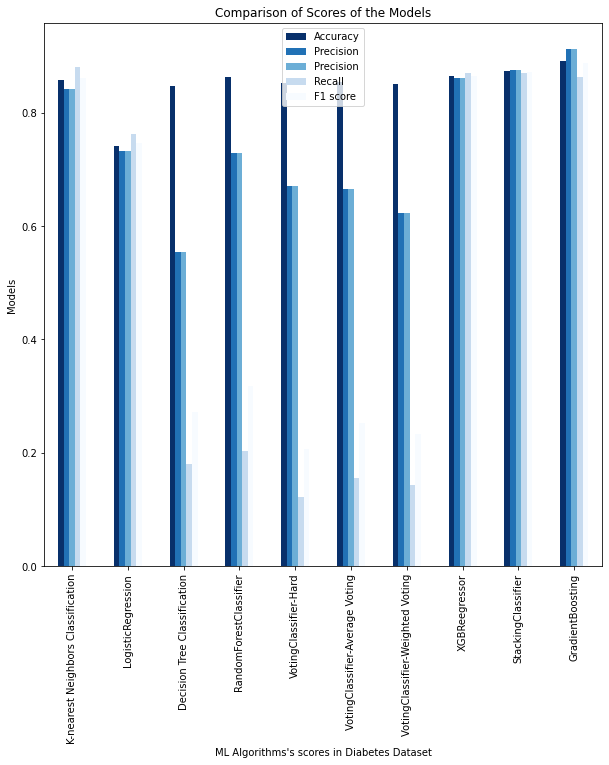

In [135]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)

TrainigSet_results.plot.bar(x='TrainigSet_Models',y=['Accuracy','Precision','Precision','Recall','F1 score'], cmap='Blues_r', figsize=(10,10))
plt.title("Comparison of Scores of the Models")
plt.ylabel("Models")
plt.xlabel("ML Algorithms's scores in Diabetes Dataset")
plt.show()

# Pickle the best model for Deployment

In [137]:
import pickle
data = {"model": gbm_tuned, "scaler": scaler}
with open('saved_steps.pkl', 'wb') as file:
    pickle.dump(data, file)
with open('saved_steps.pkl', 'rb') as file:
    data = pickle.load(file)

In [139]:
GradientBoosting = data["model"]
scaler = data["scaler"]
y_pred = GradientBoosting.predict(X_tr_smt)


array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
array([0])
pd.set_option('display.max_rows',100)
df.community_board.value_counts().index.sort_values(ascending=True)
X_tr_smt
df
pickle.format_version

